In [1]:
#Notebook to make a plot of the TC tracks in 
#model v1, v2, and IBTrACS observations. 

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [3]:
#Load the model data saved by Read_Zhao_TCs.ipynb
ds_tracks_v1 = xr.open_dataset('nc_from_xarray/zhao_tracks_v1.nc')
ds_tracks_v2 = xr.open_dataset('nc_from_xarray/zhao_tracks_v2.nc')

In [4]:
#Load the IBTrACS observation dataset, as done in Preprocess_IBTrACS.ipynb
ds_IB = xr.open_dataset('data_IBTrACS/IBTrACS_1980_2000_6h_min34_saved_20201022.nc')

In [5]:

#####   DATA EXPLORATION   #####


In [7]:
print(ds_tracks_v1['lon'])
print(np.max(ds_tracks_v1['lon']))
print(np.min(ds_tracks_v1['lon']))

<xarray.DataArray 'lon' (storm: 987, date_time: 360)>
[355320 values with dtype=float64]
Coordinates:
  * date_time  (date_time) int64 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
  * storm      (storm) int64 0 1 2 3 4 5 6 7 8 9 ... 34 35 36 37 38 39 40 41 42
<xarray.DataArray 'lon' ()>
array(180.25)
<xarray.DataArray 'lon' ()>
array(-180.25)


In [8]:
#print(ds_tracks_v1['storm'])

#Why does the "storm" coordinate only have 42 entries? No, it has 987--just retained the storm number from each year. 
#This shouldn't matter.

In [9]:
#OK so it is from -180 to 180
#IBTrACS also goes from -180 to 180
#So, why problems with storms that cross the date line?
#Hmm, that really is just a problem with the cylindrical projection!

In [12]:
#Deleted portion where I had filtered by "nature" or "usa_status" 
#(should be accessible under old git commit)

#e.g.
# usa_lon = ds_IB['usa_lon']

# usa_lon_f1 = usa_lon.where(ds_IB['nature'] != b'NR')
# usa_lon_f2 = usa_lon_f1.where(ds_IB['nature'] != b'DS')
# usa_lon_f3 = usa_lon_f2.where(ds_IB['nature'] != b'ET')
# usa_lon_filtered = usa_lon_f3.where(ds_IB['nature'] != b'MX')

In [13]:

#####   MODEL PLOTS   #####


In [14]:
#function version

def map_tracks(da_lon, da_lat, title, newfig=True):
    if newfig:
        plt.figure(figsize=(16,12))
    #m = Basemap(projection='robin', lon_0=-180, lat_0=0) #OK--looks best
    #m = Basemap(projection='cyl', lon_0=-180, lat_0=0) #Cylindrical looks fine when latlon=true.
    m = Basemap(projection='cyl', lon_0=-160, lat_0=0) #This avoids "storm crossing meridian" issue
    m.drawcoastlines(linewidth=1)
    m.drawparallels(np.linspace(-90., 90., 7))
    m.drawmeridians(np.array([30, 60, 90, 120, 150, 180, -150, -120, -90, -60, -30, 0]))
    #m.fillcontinents()

    for i in np.arange(len(da_lon.storm)):
        if not(np.mod(i,200)):
            print('Plotting ' + str(i) + 'th storm')
        x_raw = da_lon.isel(storm=i).data
        y_raw = da_lat.isel(storm=i).data
        x_nonan = x_raw[~np.isnan(x_raw)]
        y_nonan = y_raw[~np.isnan(y_raw)]
        (x, y)  = m(x_nonan, y_nonan)
        #m.plot(x, y, 'blue', linewidth=0.5)
        m.plot(x_nonan, y_nonan, 'blue', linewidth=0.5, latlon=True)
    
    plt.title(title, fontsize=20)
    
    if newfig:
        plt.tight_layout()


Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm


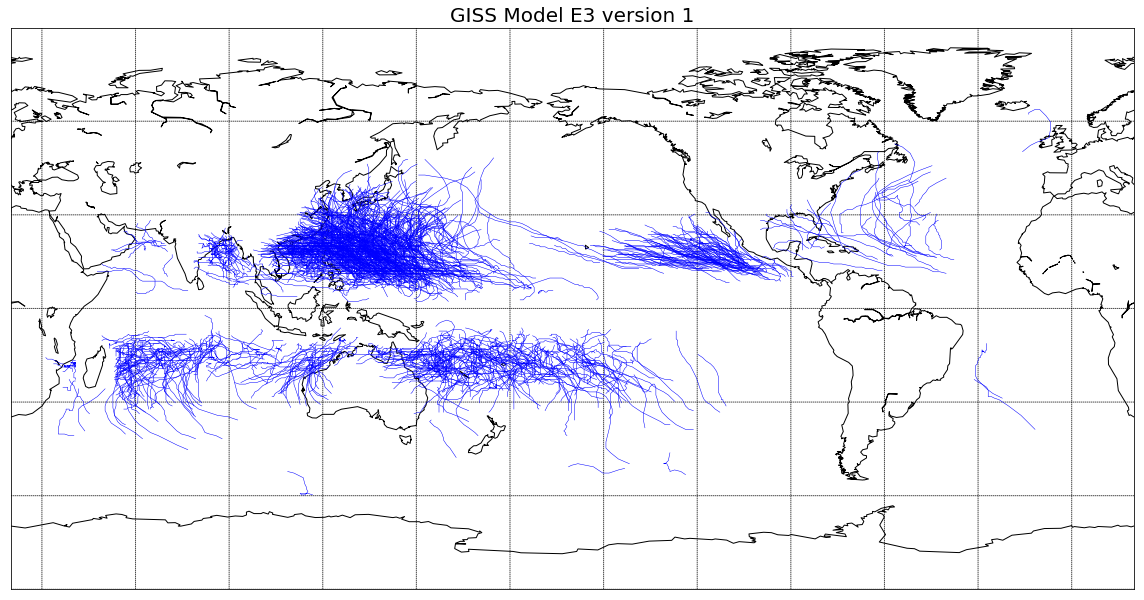

In [15]:
#v1
map_tracks(ds_tracks_v1['lon'], ds_tracks_v1['lat'], 'GISS Model E3 version 1')
plt.savefig('plots/map_tracks_v1.png')

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm


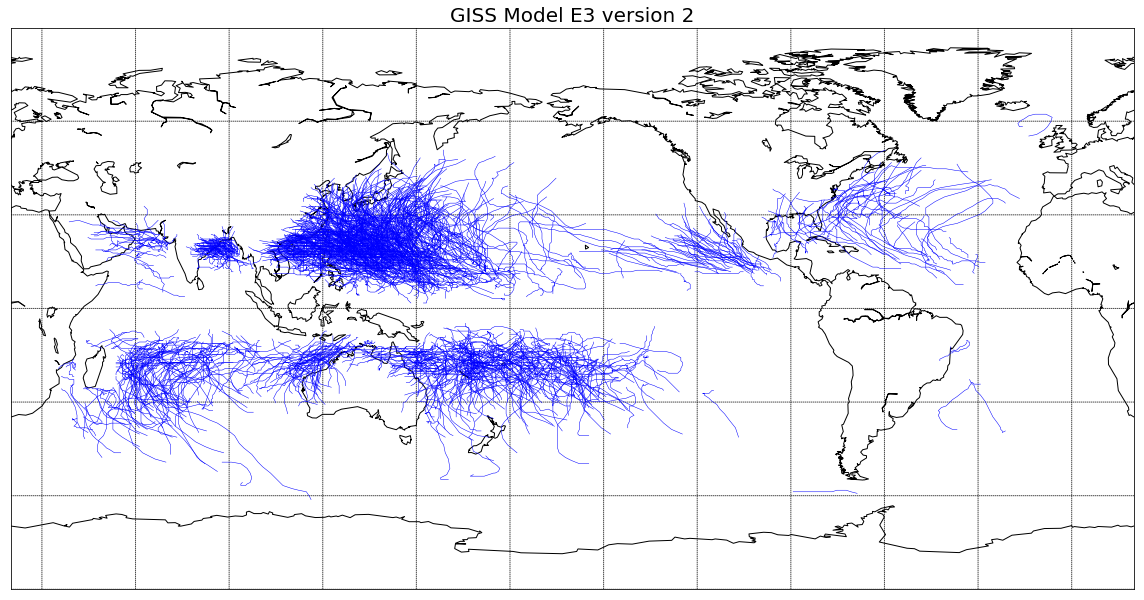

In [16]:
#v2
map_tracks(ds_tracks_v2['lon'], ds_tracks_v2['lat'], 'GISS Model E3 version 2')
plt.savefig('plots/map_tracks_v2.png')

In [17]:
#These seem to have worked! Matches what Jeff had plotted 
#(albeit without categories, which Jeff had "handicapped" anyway and Suzana doesn't want.)

In [18]:

#####   OBSERVATION PLOTS   #####


Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm
Plotting 1200th storm
Plotting 1400th storm
Plotting 1600th storm
Plotting 1800th storm


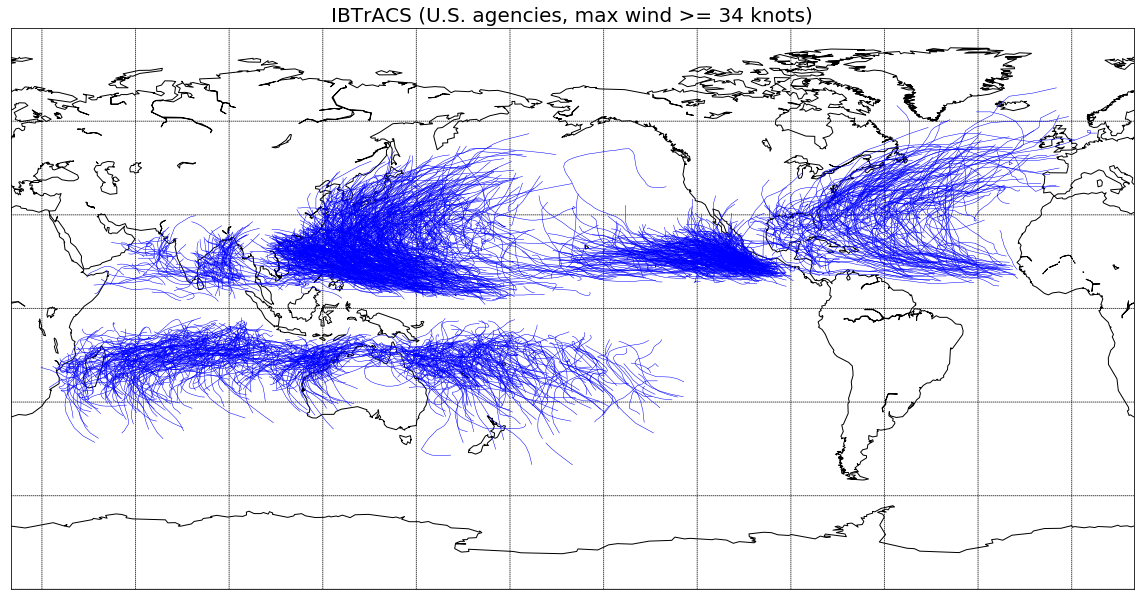

In [19]:
map_tracks(ds_IB['usa_lon'], ds_IB['usa_lat'], 'IBTrACS (U.S. agencies, max wind >= 34 knots)')
plt.savefig('plots/map_tracks_IBTrACS_34knots.png')

#OK, this looks right but have the storms crossing the Prime Meridian issue again.

In [20]:
#Old "filtered" version:

In [21]:
#map_tracks_model(usa_lon_filtered, usa_lat_filtered, 'IBTrACS (filtered by "nature")')
#plt.savefig('plots/map_tracks_IBTrACS_1980-2000_filtered_nature.png')

In [22]:
##map_tracks_model(usa_lon_filtered_us, usa_lat_filtered_us, 'IBTrACS (filtered by "usa_status")')
#This version seems to include more extratropical storms outside of Atlantic. 
#And the above gets rid of almost everything in the north Indian Ocean!
#"NR" and "MX" may have been the problem for "nature" as some agencies don't report on 
#storms outside their area of responsibility or don't report type...
#Should probably use this version; consistent with what's reported by the US agency. 
##plt.savefig('plots/map_tracks_IBTrACS_1980-2000_filtered_usa_status.png')

In [23]:

#####   COMBINED PLOTS (SUBPLOTS)  #####


Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm
Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm
Plotting 1200th storm
Plotting 1400th storm
Plotting 1600th storm
Plotting 1800th storm


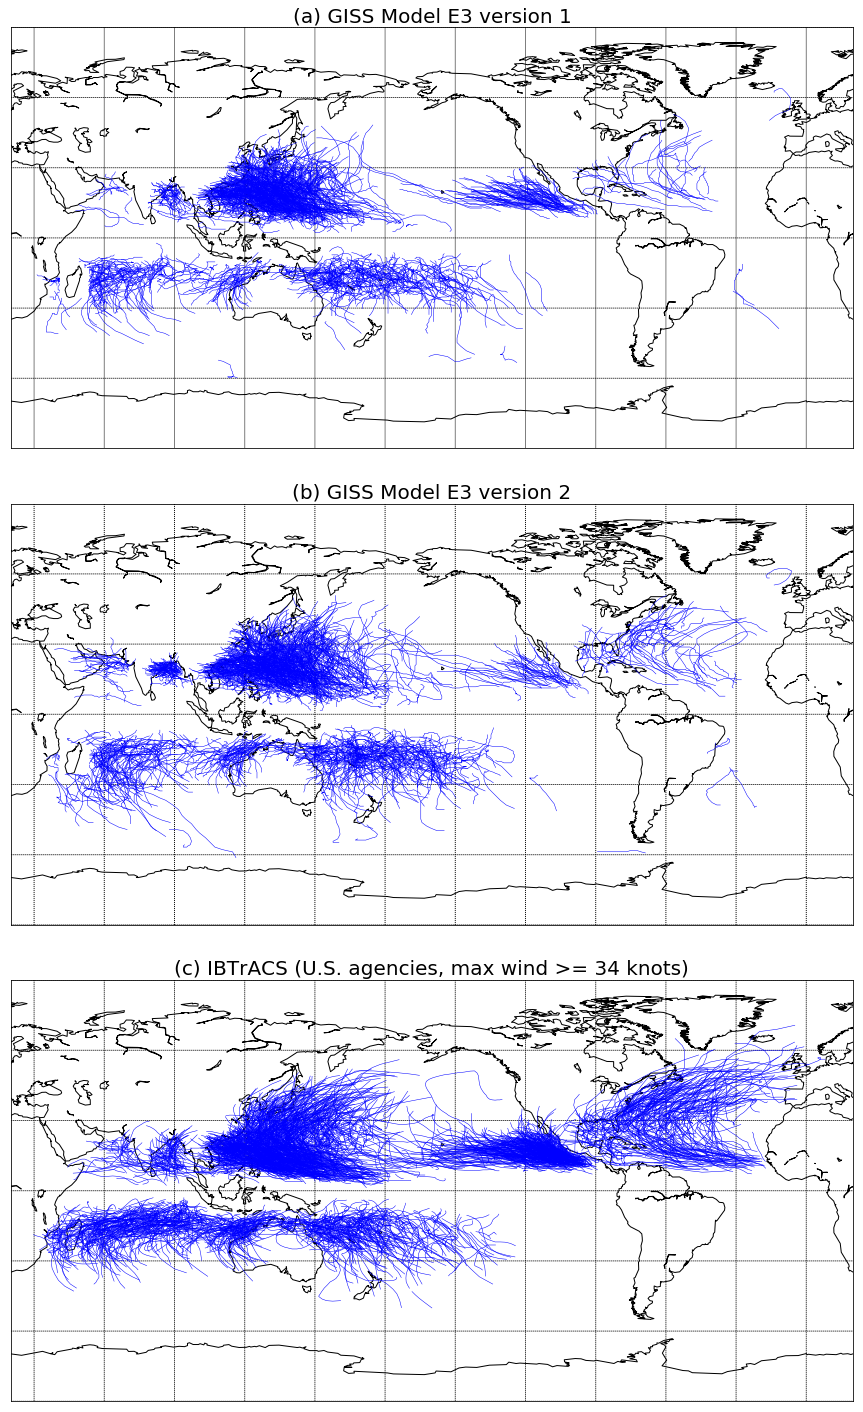

In [24]:
plt.figure(figsize=(12,20))
plt.subplot(3,1,1)
map_tracks(ds_tracks_v1['lon'], ds_tracks_v1['lat'], '(a) GISS Model E3 version 1', newfig=False)
plt.subplot(3,1,2)
map_tracks(ds_tracks_v2['lon'], ds_tracks_v2['lat'], '(b) GISS Model E3 version 2', newfig=False)
plt.subplot(3,1,3)
map_tracks(ds_IB['usa_lon'], ds_IB['usa_lat'], '(c) IBTrACS (U.S. agencies, max wind >= 34 knots)', newfig=False)
plt.tight_layout()
plt.savefig('plots/map_tracks_1980-2000_v1_v2_IBTrACS-34.png')

In [1]:

#####   TEST PLOTTING WITH REGION TAGS   #####


In [ ]:
#Color-code by region?
#Storm might cross between regions so need to mask at each point and plot multiple times.
#Try NH vs. SH first, simpler case

In [5]:
#New input argument for whether it's in the Northern Hemisphere
def map_tracks_hemispheres(da_lon, da_lat, da_isNH, title, newfig=True):
    if newfig:
        plt.figure(figsize=(16,12))
    #m = Basemap(projection='robin', lon_0=-180, lat_0=0) #OK--looks best
    #m = Basemap(projection='cyl', lon_0=-180, lat_0=0) #Cylindrical looks fine when latlon=true.
    m = Basemap(projection='cyl', lon_0=-160, lat_0=0) #This avoids "storm crossing meridian" issue
    m.drawcoastlines(linewidth=1)
    m.drawparallels(np.linspace(-90., 90., 7))
    m.drawmeridians(np.array([30, 60, 90, 120, 150, 180, -150, -120, -90, -60, -30, 0]))
    #m.fillcontinents()
    
    #Mask by hemispheres 
    lon_NH = da_lon.where(da_isNH)
    lat_NH = da_lat.where(da_isNH)
    lon_SH = da_lon.where(np.logical_not(da_isNH))
    lat_SH = da_lat.where(np.logical_not(da_isNH))

    #Plot northern hemisphere
    for i in np.arange(len(da_lon.storm)):
        if not(np.mod(i,200)):
            print('Plotting ' + str(i) + 'th storm (NH)')
        x_raw = lon_NH.isel(storm=i).data
        y_raw = lat_NH.isel(storm=i).data
        x_nonan = x_raw[~np.isnan(x_raw)]
        y_nonan = y_raw[~np.isnan(y_raw)]
        m.plot(x_nonan, y_nonan, 'red', linewidth=0.5, latlon=True)
        
    #Plot southern hemisphere
    for i in np.arange(len(da_lon.storm)):
        if not(np.mod(i,200)):
            print('Plotting ' + str(i) + 'th storm (SH)')
        x_raw = lon_SH.isel(storm=i).data
        y_raw = lat_SH.isel(storm=i).data
        x_nonan = x_raw[~np.isnan(x_raw)]
        y_nonan = y_raw[~np.isnan(y_raw)]
        m.plot(x_nonan, y_nonan, 'green', linewidth=0.5, latlon=True)
    
    plt.title(title, fontsize=20)
    
    if newfig:
        plt.tight_layout()

Plotting 0th storm (NH)
Plotting 200th storm (NH)
Plotting 400th storm (NH)
Plotting 600th storm (NH)
Plotting 800th storm (NH)
Plotting 0th storm (SH)
Plotting 200th storm (SH)
Plotting 400th storm (SH)
Plotting 600th storm (SH)
Plotting 800th storm (SH)


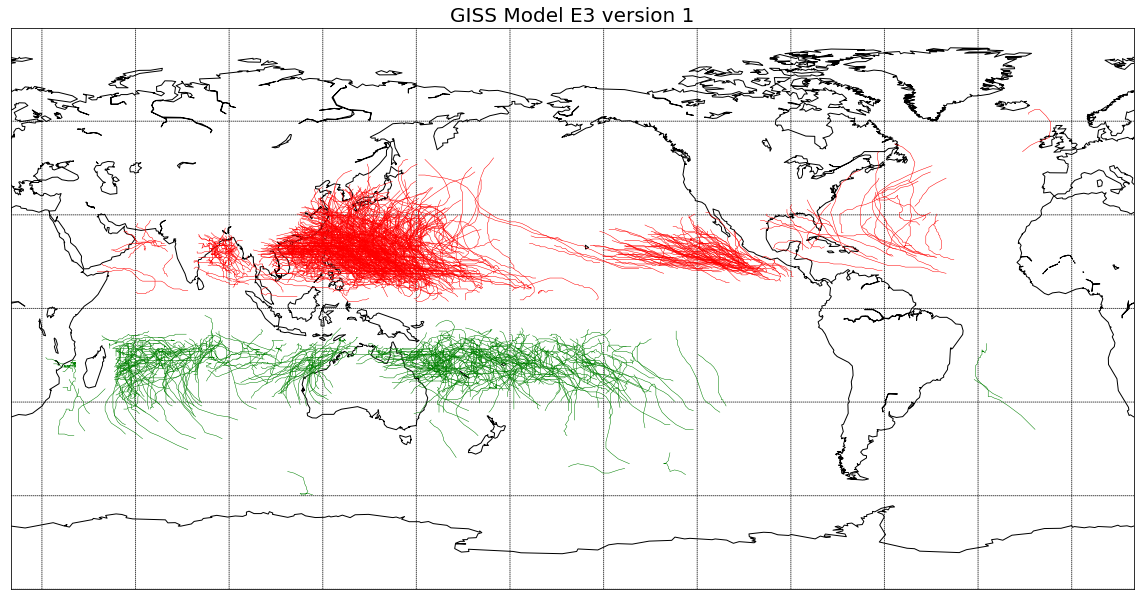

In [6]:
map_tracks_hemispheres(ds_tracks_v1['lon'], ds_tracks_v1['lat'], ds_tracks_v1['in_NH'], 'GISS Model E3 version 1')
#Worked perfectly on the first try!
plt.savefig('plots/map_tracks_hemispheres_v1')

In [6]:
#Now, version for the 8 regions Jeff defined: 
#NI, WP, EP, NA, SI, AUS, SP, SA
#This time input a list of region tag arrays instead of 8 different arguments
#Also input a list of colors
#This is flexible for more regions
def map_tracks_regions(da_lon, da_lat, da_regions_list, colors_list, title, newfig=True):
    if newfig:
        plt.figure(figsize=(16,12))
    #m = Basemap(projection='robin', lon_0=-180, lat_0=0) #OK--looks best
    #m = Basemap(projection='cyl', lon_0=-180, lat_0=0) #Cylindrical looks fine when latlon=true.
    m = Basemap(projection='cyl', lon_0=-160, lat_0=0) #This avoids "storm crossing meridian" issue
    m.drawcoastlines(linewidth=1)
    m.drawparallels(np.linspace(-90., 90., 7))
    m.drawmeridians(np.array([30, 60, 90, 120, 150, 180, -150, -120, -90, -60, -30, 0]))
    #m.fillcontinents()
    
    #In loop over regions: mask by region and plot
    for j in np.arange(len(da_regions_list)):
        lon_region = da_lon.where(da_regions_list[j])
        lat_region = da_lat.where(da_regions_list[j])
        print('Filtering done for region: '+str(j))

        for i in np.arange(len(da_lon.storm)):
            if not(np.mod(i,200)):
                print('Plotting ' + str(i) + 'th storm (region ' + str(j) + ')')
            x_raw = lon_region.isel(storm=i).data
            y_raw = lat_region.isel(storm=i).data
            x_nonan = x_raw[~np.isnan(x_raw)]
            y_nonan = y_raw[~np.isnan(y_raw)]
            m.plot(x_nonan, y_nonan, colors_list[j], linewidth=0.5, latlon=True)
        
    plt.title(title, fontsize=20)
    
    if newfig:
        plt.tight_layout()

In [9]:
colors_list = ['red', 'green', 'blue', 'darkcyan', 'magenta', 'coral', 'maroon', 'hotpink']

In [9]:
regions_list_v1 = [ds_tracks_v1['in_NI'], 
                   ds_tracks_v1['in_WP'], 
                   ds_tracks_v1['in_EP'], 
                   ds_tracks_v1['in_NA'],
                   ds_tracks_v1['in_SI'], 
                   ds_tracks_v1['in_AUS'], 
                   ds_tracks_v1['in_SP'], 
                   ds_tracks_v1['in_SA']]

Filtering done for region: 0
Plotting 0th storm (region 0)
Plotting 200th storm (region 0)
Plotting 400th storm (region 0)
Plotting 600th storm (region 0)
Plotting 800th storm (region 0)
Filtering done for region: 1
Plotting 0th storm (region 1)
Plotting 200th storm (region 1)
Plotting 400th storm (region 1)
Plotting 600th storm (region 1)
Plotting 800th storm (region 1)
Filtering done for region: 2
Plotting 0th storm (region 2)
Plotting 200th storm (region 2)
Plotting 400th storm (region 2)
Plotting 600th storm (region 2)
Plotting 800th storm (region 2)
Filtering done for region: 3
Plotting 0th storm (region 3)
Plotting 200th storm (region 3)
Plotting 400th storm (region 3)
Plotting 600th storm (region 3)
Plotting 800th storm (region 3)
Filtering done for region: 4
Plotting 0th storm (region 4)
Plotting 200th storm (region 4)
Plotting 400th storm (region 4)
Plotting 600th storm (region 4)
Plotting 800th storm (region 4)
Filtering done for region: 5
Plotting 0th storm (region 5)
Plotti

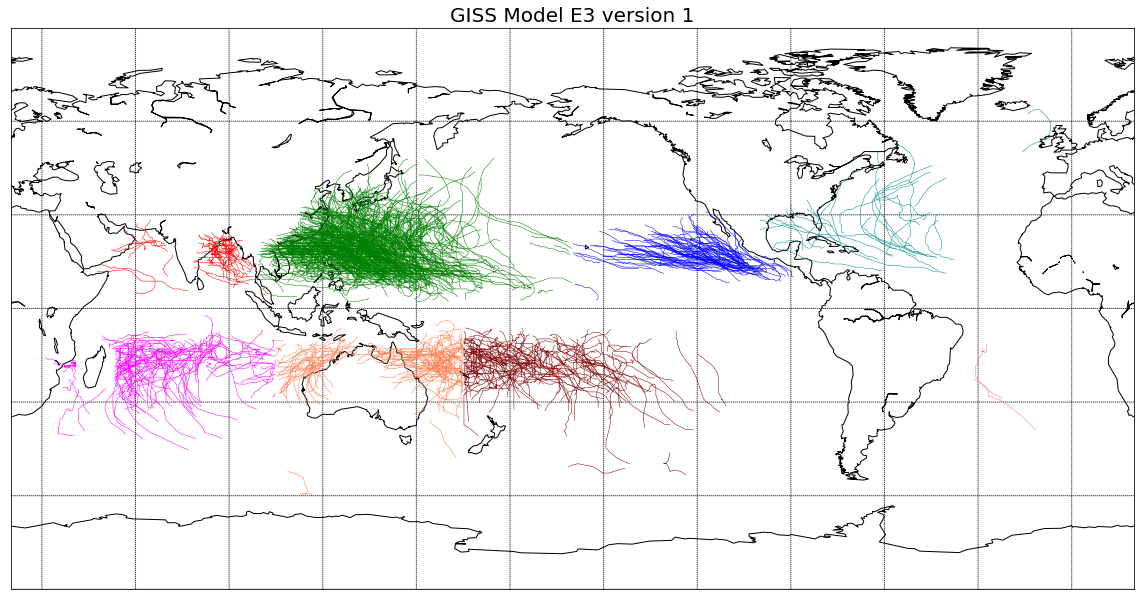

In [10]:
map_tracks_regions(ds_tracks_v1['lon'], ds_tracks_v1['lat'], regions_list_v1, colors_list, 'GISS Model E3 version 1')
plt.savefig('plots/map_tracks_colored_regions_v1.png')

In [11]:
regions_list_v2 = [ds_tracks_v2['in_NI'], 
                   ds_tracks_v2['in_WP'], 
                   ds_tracks_v2['in_EP'], 
                   ds_tracks_v2['in_NA'],
                   ds_tracks_v2['in_SI'], 
                   ds_tracks_v2['in_AUS'], 
                   ds_tracks_v2['in_SP'], 
                   ds_tracks_v2['in_SA']]

In [10]:
map_tracks_regions(ds_tracks_v2['lon'], ds_tracks_v2['lat'], regions_list_v2, colors_list, 'GISS Model E3 version 2')
plt.savefig('plots/map_tracks_colored_regions_v2.png')

NameError: name 'regions_list_v2' is not defined

In [11]:
regions_list_IB = [ds_IB['in_NI'], 
                   ds_IB['in_WP'], 
                   ds_IB['in_EP'], 
                   ds_IB['in_NA'],
                   ds_IB['in_SI'], 
                   ds_IB['in_AUS'], 
                   ds_IB['in_SP'], 
                   ds_IB['in_SA']]

Filtering done for region: 0
Plotting 0th storm (region 0)
Plotting 200th storm (region 0)
Plotting 400th storm (region 0)
Plotting 600th storm (region 0)
Plotting 800th storm (region 0)
Plotting 1000th storm (region 0)
Plotting 1200th storm (region 0)
Plotting 1400th storm (region 0)
Plotting 1600th storm (region 0)
Plotting 1800th storm (region 0)
Filtering done for region: 1
Plotting 0th storm (region 1)
Plotting 200th storm (region 1)
Plotting 400th storm (region 1)
Plotting 600th storm (region 1)
Plotting 800th storm (region 1)
Plotting 1000th storm (region 1)
Plotting 1200th storm (region 1)
Plotting 1400th storm (region 1)
Plotting 1600th storm (region 1)
Plotting 1800th storm (region 1)
Filtering done for region: 2
Plotting 0th storm (region 2)
Plotting 200th storm (region 2)
Plotting 400th storm (region 2)
Plotting 600th storm (region 2)
Plotting 800th storm (region 2)
Plotting 1000th storm (region 2)
Plotting 1200th storm (region 2)
Plotting 1400th storm (region 2)
Plotting 1

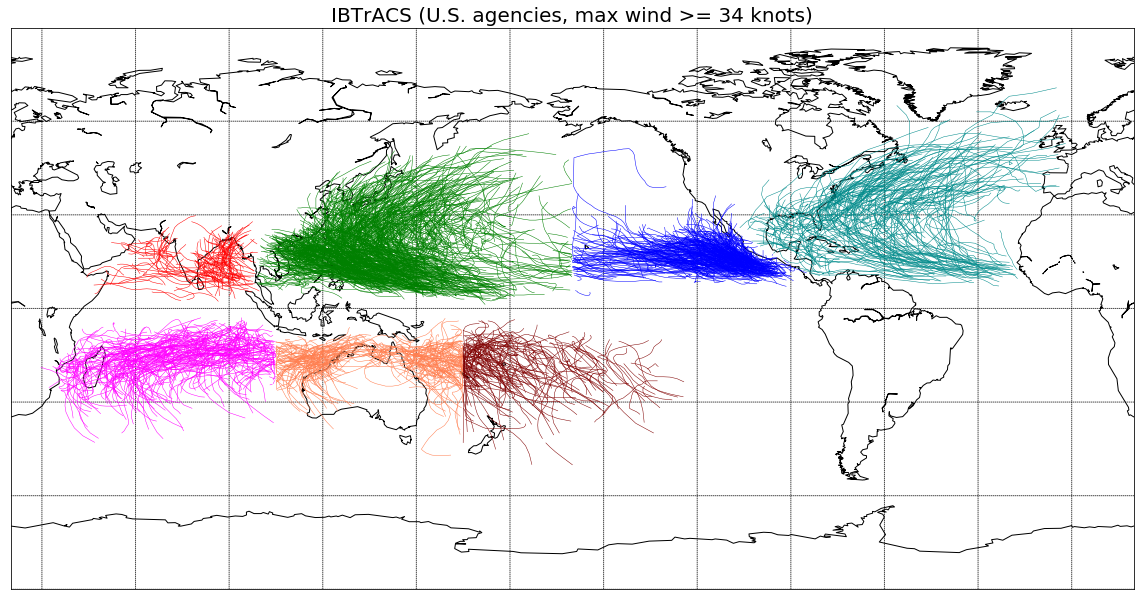

In [12]:
map_tracks_regions(ds_IB['usa_lon'], ds_IB['usa_lat'], regions_list_IB, colors_list, 'IBTrACS (U.S. agencies, max wind >= 34 knots)')
plt.savefig('plots/map_tracks_colored_regions_IB.png')
#OK, seems like the diagonal line Jeff used to separate the Atlantic and the Pacific isn't perfect ("Atlantic" storm near Alaska)

In [21]:
#Version based on origin region instead? Would help visualize storms that cross over, and test that it worked.
def map_tracks_origin_regions(da_lon, da_lat, regions_list, colors_list, ds_for_region_tags, title, newfig=True):
    if newfig:
        plt.figure(figsize=(16,12))
    #m = Basemap(projection='robin', lon_0=-180, lat_0=0) #OK--looks best
    #m = Basemap(projection='cyl', lon_0=-180, lat_0=0) #Cylindrical looks fine when latlon=true.
    m = Basemap(projection='cyl', lon_0=-160, lat_0=0, llcrnrlat=-70,urcrnrlat=70,) #This avoids "storm crossing meridian" issue
    m.drawcoastlines(linewidth=1)
    m.drawparallels(np.linspace(-90., 90., 7))
    m.drawmeridians(np.array([30, 60, 90, 120, 150, 180, -150, -120, -90, -60, -30, 0]))
    #m.fillcontinents()
    
    #Plot each storm color-coded by genesis region
    for i in np.arange(len(da_lon.storm)):
        if not(np.mod(i,200)):
            print('Plotting ' + str(i) + 'th storm')
        x_raw = da_lon.isel(storm=i).data
        y_raw = da_lat.isel(storm=i).data
        x_nonan = x_raw[~np.isnan(x_raw)]
        y_nonan = y_raw[~np.isnan(y_raw)]
    
        for j in np.arange(len(regions_list)):
            if ds_for_region_tags['gen_'+regions_list[j]].isel(storm=i):
                m.plot(x_nonan, y_nonan, colors_list[j], linewidth=0.5, latlon=True)
        
    plt.title(title, fontsize=20)
    
    plt.gca().set_ylim(-70,70)
    
    if newfig:
        plt.tight_layout()

In [22]:
regions_list = ['NI', 'WP', 'EP', 'NA', 'SI', 'AUS', 'SP', 'SA']
colors_list = ['red', 'green', 'blue', 'darkcyan', 'magenta', 'coral', 'maroon', 'hotpink']

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm


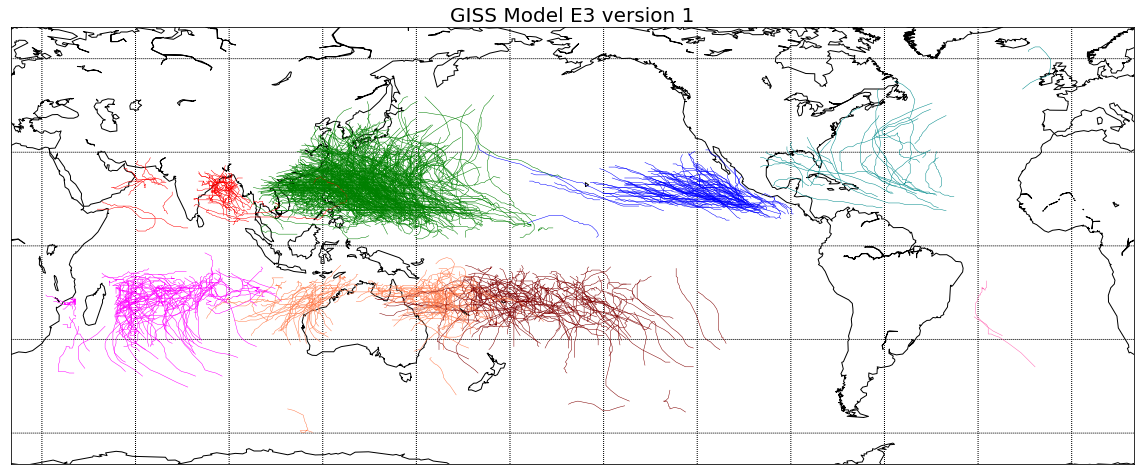

In [23]:
map_tracks_origin_regions(ds_tracks_v1['lon'], ds_tracks_v1['lat'], regions_list, colors_list, ds_tracks_v1, 'GISS Model E3 version 1')
plt.savefig('plots/map_tracks_colored_origins_v1.png')

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm


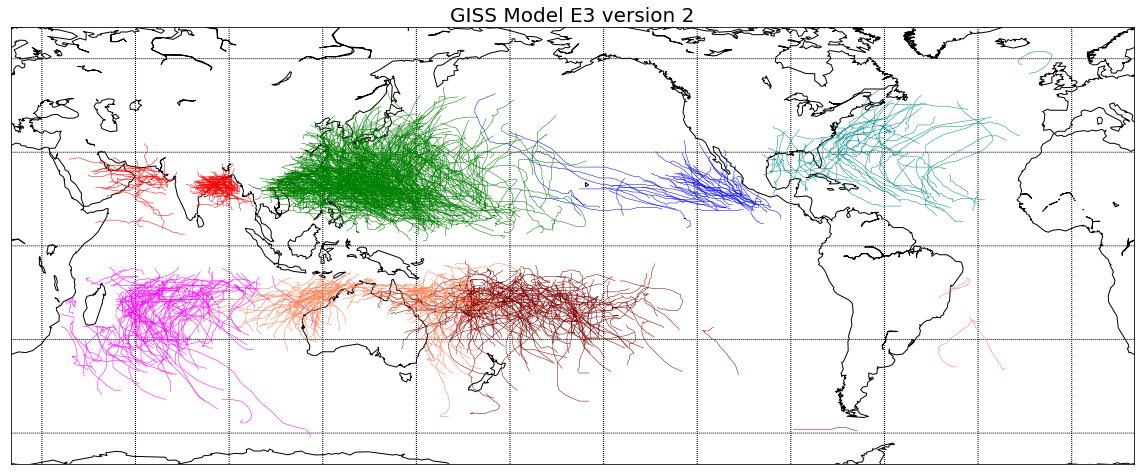

In [24]:
map_tracks_origin_regions(ds_tracks_v2['lon'], ds_tracks_v2['lat'], regions_list, colors_list, ds_tracks_v2, 'GISS Model E3 version 2')
plt.savefig('plots/map_tracks_colored_origins_v2.png')

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm
Plotting 1200th storm
Plotting 1400th storm
Plotting 1600th storm
Plotting 1800th storm


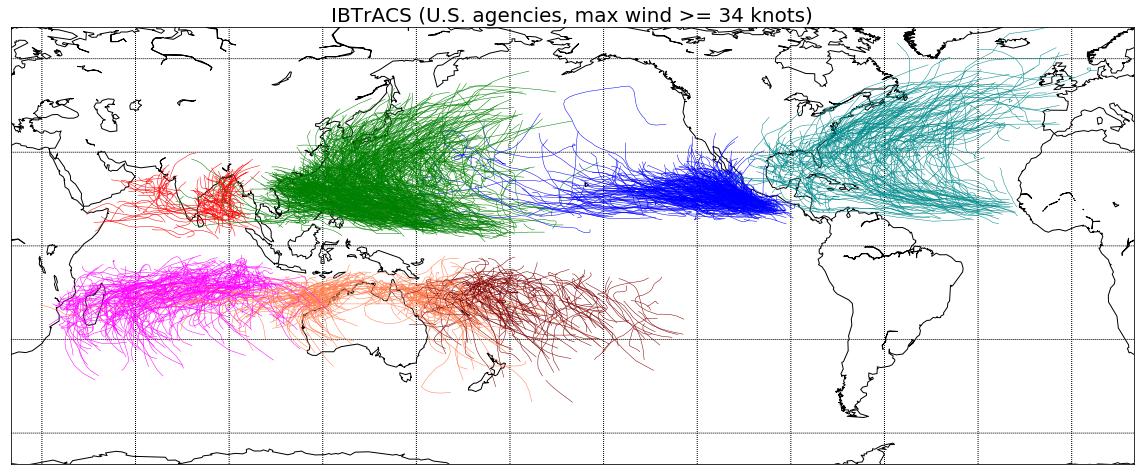

In [25]:
map_tracks_origin_regions(ds_IB['usa_lon'], ds_IB['usa_lat'], regions_list, colors_list, ds_IB, 'IBTrACS (U.S. agencies, max wind >= 34 knots)')
plt.savefig('plots/map_tracks_colored_origins_IB.png')

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm
Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm
Plotting 1200th storm
Plotting 1400th storm
Plotting 1600th storm
Plotting 1800th storm


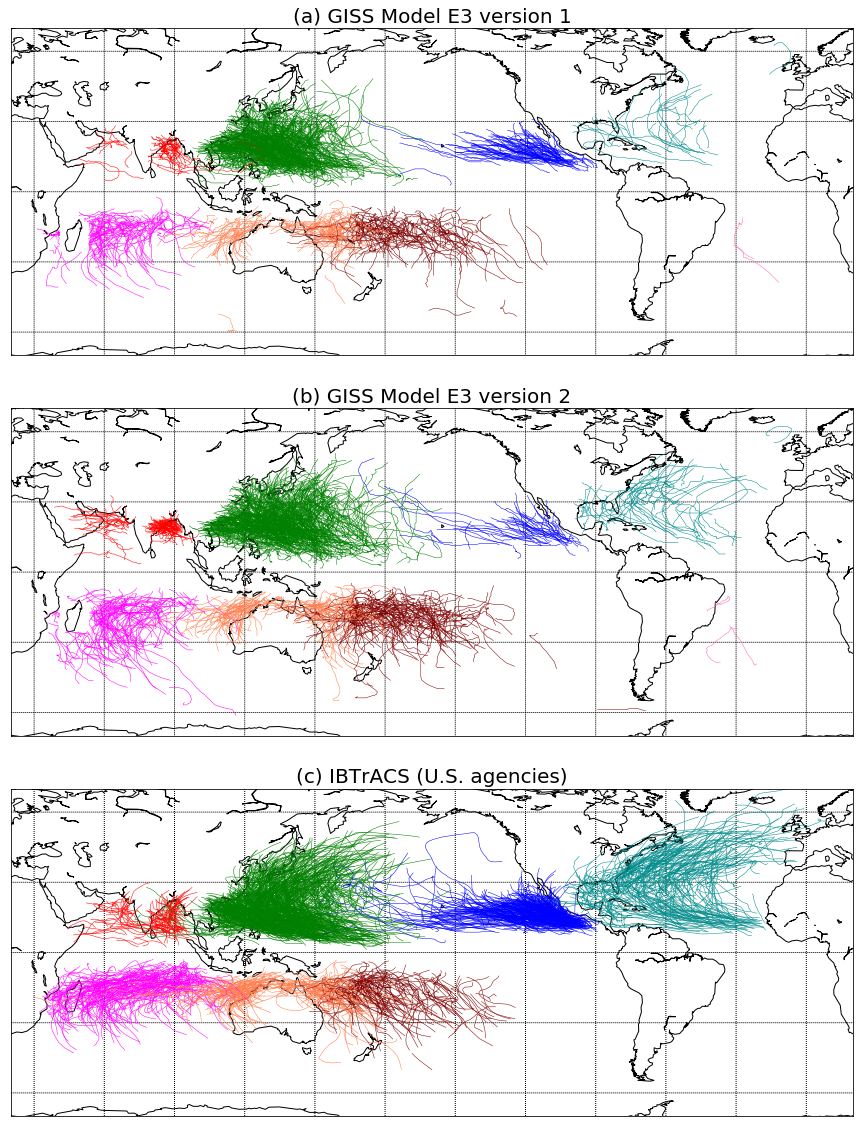

In [26]:
#3-panel version
plt.figure(figsize=(12,16))
plt.subplot(3,1,1)
map_tracks_origin_regions(ds_tracks_v1['lon'], ds_tracks_v1['lat'], regions_list, colors_list, ds_tracks_v1, '(a) GISS Model E3 version 1', newfig=False)
plt.subplot(3,1,2)
map_tracks_origin_regions(ds_tracks_v2['lon'], ds_tracks_v2['lat'], regions_list, colors_list, ds_tracks_v2,  '(b) GISS Model E3 version 2', newfig=False)
plt.subplot(3,1,3)
map_tracks_origin_regions(ds_IB['usa_lon'], ds_IB['usa_lat'], regions_list, colors_list, ds_IB, '(c) IBTrACS (U.S. agencies)', newfig=False)
plt.tight_layout()
plt.savefig('plots/map_tracks_1980-2000_3panels_originRegions.png')

In [ ]:

#####   GENESIS LOCATIONS   ##### 


In [44]:
#For observations, how to decide this? Should be just first point in the track probably

In [53]:
#Function--one version for model or obs. (subset for lon, lat first):
def map_genesis_points(da_lon, da_lat, title, newfig=True):
    if newfig:
        plt.figure(figsize=(16,12))
    m = Basemap(projection='robin', lon_0=-180, lat_0=0)
    #m = Basemap(projection='cyl', lon_0=-160, lat_0=0) #OK: somehow THIS won't work with cyl. projection even with latlon, but line plots did?
    m.drawcoastlines(linewidth=1)
    m.drawparallels(np.linspace(-90., 90., 7))
    m.drawmeridians(np.array([30, 60, 90, 120, 150, 180, -150, -120, -90, -60, -30, 0]))
    #m.fillcontinents()

    for i in np.arange(len(da_lon.storm)):
        if not(np.mod(i,200)):
            print('Plotting ' + str(i) + 'th storm')
        x_raw = da_lon.isel(storm=i).data
        y_raw = da_lat.isel(storm=i).data
        #drop nans (to exclude any at the beginning of the storm as well due to non-TC status)
        x_nonan = x_raw[~np.isnan(x_raw)]
        y_nonan = y_raw[~np.isnan(y_raw)]
        #find beginning data point
        try: 
            x_gen = x_nonan[0]
            y_gen = y_nonan[0]
            (x, y)  = m(x_gen, y_gen)
            #m.scatter(x, y, marker='x', color='blue', linewidths=0.5)
            m.scatter(x_gen, y_gen, marker='x', color='blue', linewidths=0.5, latlon=True)
        except:
            pass
    
    plt.title(title, fontsize=20)

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm


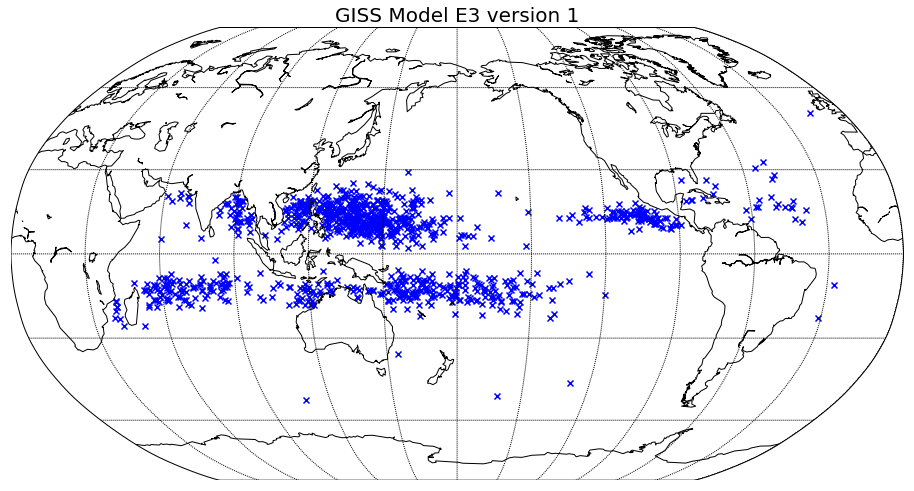

In [54]:
map_genesis_points(ds_tracks_v1['lon'], ds_tracks_v1['lat'], 'GISS Model E3 version 1')
plt.savefig('plots/map_genpoints_v1.png')

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm


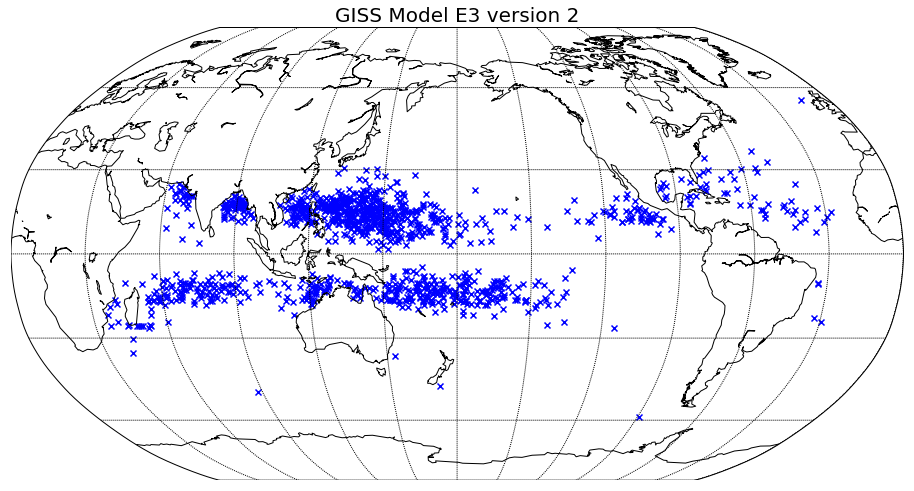

In [55]:
map_genesis_points(ds_tracks_v2['lon'], ds_tracks_v2['lat'], 'GISS Model E3 version 2')
plt.savefig('plots/map_genpoints_v2.png')

Plotting 0th storm
Plotting 200th storm
Plotting 400th storm
Plotting 600th storm
Plotting 800th storm
Plotting 1000th storm
Plotting 1200th storm
Plotting 1400th storm
Plotting 1600th storm
Plotting 1800th storm


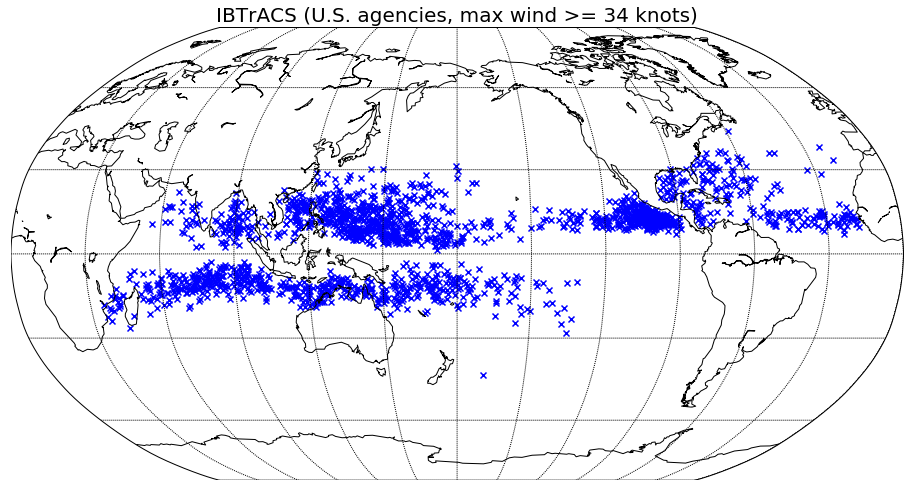

In [57]:
map_genesis_points(ds_IB['usa_lon'], ds_IB['usa_lat'], 'IBTrACS (U.S. agencies, max wind >= 34 knots)')
plt.savefig('plots/map_genpoints_IBTrACS_34knots.png')

In [58]:
#Keep these for reference but don't bother with 3-panel version unless we decide to put in the paper.